In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = np.array([
    [2.5, 2.4],
    [0.5, 0.7],
    [2.2, 2.9],
    [1.9, 2.2],
    [3.1, 3],
    [2.3, 2.7],
    [2, 1.6],
    [1, 1.1],
    [1.5, 1.6],
    [1.1, 0.9]
])
df = pd.DataFrame(data, columns=['A', 'B'])
point_names = [f'p{i}' for i in range(len(df))]
p_df = pd.concat([pd.Series(point_names, name='Points'), df], axis=1)
p_df = p_df.set_index('Points')
p_df

,A,B
Points,,
p0,2.5,2.4
p1,0.5,0.7
p2,2.2,2.9
p3,1.9,2.2
p4,3.1,3.0
p5,2.3,2.7
p6,2.0,1.6
p7,1.0,1.1
p8,1.5,1.6


Plotting data

In [ ]:
import matplotlib.pyplot as plt

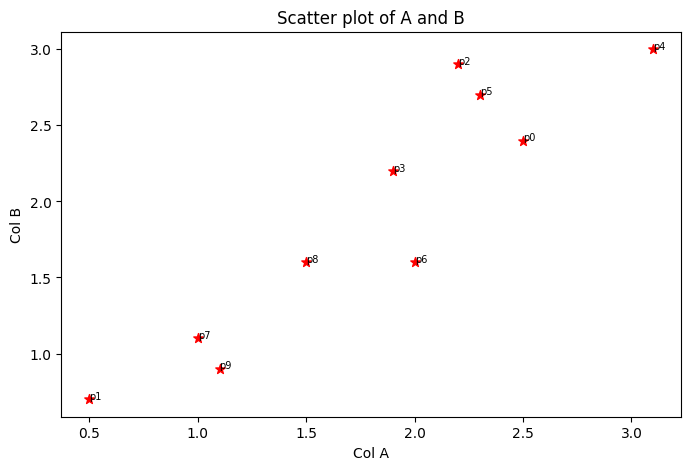

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(p_df['A'], p_df['B'], c='r', marker='*', s=50)
plt.xlabel('Col A')
plt.ylabel('Col B')
plt.title('Scatter plot of A and B')
for pt in p_df.itertuples():
  plt.annotate(pt.Index, (pt.A, pt.B), fontsize=7)

plt.show()

Single linkage clustering using scikit-learn

### pdist
To find distance between 2 points (default distance metric is 'euclidean')

pdist returns an array of $\frac{n(n-1)}{2}$ values (pdist from 1st point to n-1 points, 2nd point to n-2 points and so on; so $(n-1) + (n-2) + \dots + 1 = \frac{n(n-1)}{2}$ points)

### squareform
squareform converts the array returned by pdist into a symmetric square-matrix

### Dendrogram
- y axis: distance between the centroids of the clusters
- x axis: the clusters

In [ ]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform, pdist

In [ ]:
shc_data = pd.DataFrame(
    squareform(pdist(data, 'euclidean')),
    columns=point_names,
    index=point_names
)
shc_data

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9
p0,0.000000,2.624881,0.583095,0.632456,0.848528,0.360555,0.943398,1.984943,1.280625,2.051828
p1,2.624881,0.000000,2.780288,2.051828,3.471311,2.690725,1.749286,0.640312,1.345362,0.632456
p2,0.583095,2.780288,0.000000,0.761577,0.905539,0.223607,1.315295,2.163331,1.476482,2.282542
p3,0.632456,2.051828,0.761577,0.000000,1.442221,0.640312,0.608276,1.421267,0.721110,1.526434
p4,0.848528,3.471311,0.905539,1.442221,0.000000,0.854400,1.780449,2.831960,2.126029,2.900000
p5,0.360555,2.690725,0.223607,0.640312,0.854400,0.000000,1.140175,2.061553,1.360147,2.163331
p6,0.943398,1.749286,1.315295,0.608276,1.780449,1.140175,0.000000,1.118034,0.500000,1.140175
p7,1.984943,0.640312,2.163331,1.421267,2.831960,2.061553,1.118034,0.000000,0.707107,0.223607
p8,1.280625,1.345362,1.476482,0.721110,2.126029,1.360147,0.500000,0.707107,0.000000,0.806226
p9,2.051828,0.632456,2.282542,1.526434,2.900000,2.163331,1.140175,0.223607,0.806226,0.000000


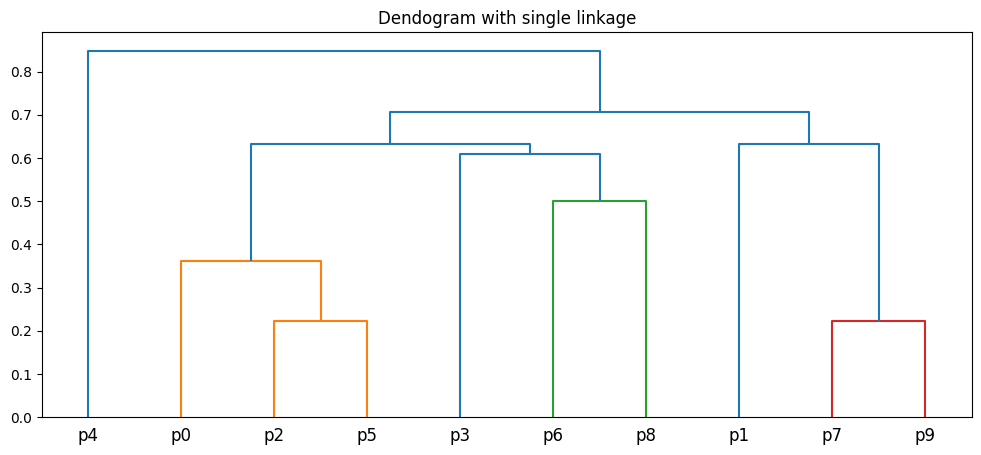

In [ ]:
plt.figure(figsize=(12, 5))
plt.title('Dendogram with single linkage')
shc = hierarchy.linkage(data, method='single')
dend = hierarchy.dendrogram(shc, labels=shc_data.index)

Complete linkage clustering using scikit-learn

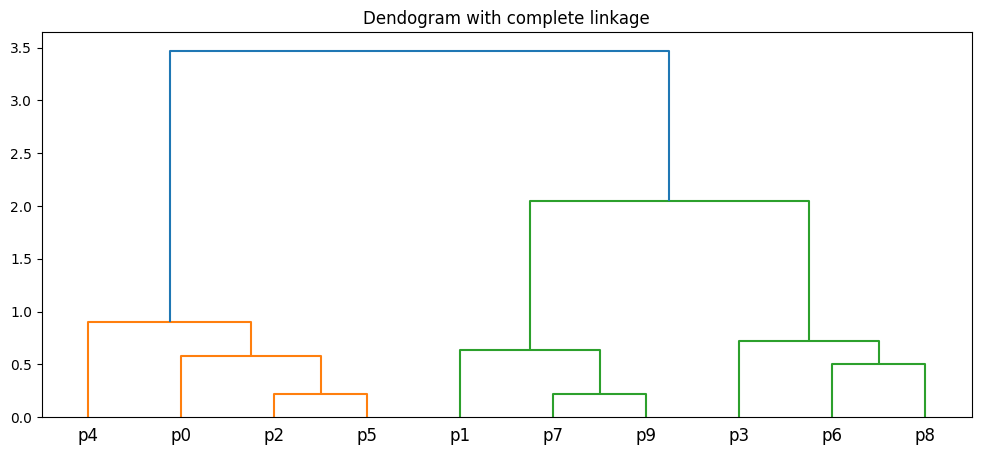

In [ ]:
plt.figure(figsize=(12, 5))
plt.title('Dendogram with complete linkage')
shc = hierarchy.linkage(data, method='complete')
dend = hierarchy.dendrogram(shc, labels=shc_data.index)